In [119]:
import os
import pandas as pd
import numpy as np

import plotly.express as pxA
from IPython.display import display


# Is Talon (tutor Costin’s favorite champion) more likely to win or lose any given match?

Null: winrate = 50%
Alt: winrate > 50%

In [3]:
league_fp = os.path.join('data', '2022_LoL_esports_match_data_from_OraclesElixir.csv')
league_raw = pd.read_csv(league_fp)

/Users/elim-mbp-01/.pyenv/versions/3.8.16/envs/dsc80_39/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [200]:
league_raw.shape[0]

149400

In [198]:
(league_raw["champion"].isna()).sum()

24900

In [127]:
# drop non-completed matches
# what does partial mean here? 
league_raw["datacompleteness"].value_counts()

complete    127044
partial      21828
ignore         528
Name: datacompleteness, dtype: int64

In [135]:
league_raw["result"]
league_completed["result"]

0         0
1         0
2         0
3         0
4         0
         ..
149131    0
149132    0
149133    0
149134    1
149135    0
Name: result, Length: 127044, dtype: int64

In [202]:
# =======================
# CLEANING 
# =======================

league = league_raw.copy()

# =======================================================
# Each 'gameid' corresponds to up to 12 rows – one for each of the 5 players on both teams and 2 containing summary data for the two teams (try to find out what distinguishes those rows). After selecting your line of inquiry, make sure to remove either the player rows or the team rows so as not to have issues later in your analysis.

# 24900 rows without a champion 
# (league_raw["champion"].isna()).sum()
# 149400 rows total. 12 rows per match. 149400 / 12 = 12450 matches. 
# 12450 * 2 = 24900 team related rows
# (149400 / 12) = 12450 matches. 12450 * 2 = 24900
league = league[league["champion"].notna()] 
# =======================================================

# =======================================================
# Many columns should be of type bool but are not.
columns_to_bool = []
for column in league.columns:
    value_counts = league[column].value_counts()
    if set(value_counts.index) == {0, 1}:
        columns_to_bool.append(column)
        league[column] = league[column].astype(bool)
print(f"CONVERTED {len(columns_to_bool)} COLUMNS TO BOOL")
# =======================================================

league = league[league["datacompleteness"] == "complete"]
league = league.convert_dtypes()
league.info()


CONVERTED 6 COLUMNS TO BOOL
<class 'pandas.core.frame.DataFrame'>
Int64Index: 105870 entries, 0 to 149133
Columns: 123 entries, gameid to opp_deathsat15
dtypes: Float64(13), Int64(86), boolean(6), string(18)
memory usage: 106.5 MB


In [220]:
# =====================
# HYPOTHESIS TEST
# =====================

# Null Hypothesis: Talon's win rate is 50%
# Alternative Hypothesis: Talon's win rate is greater than 50%

# Test Shatistic: Talon's proportion of matches won. This is an appropiate choice of test statistic, as larger values point towards the alternative hypothesis, and smaller values point towards the null hypothesis.
# Significance Level: 0.05

talon_rows = league[league["champion"] == "Talon"]
observed_ts = talon_rows["result"].mean()

sims = np.random.multinomial(talon_rows.shape[0], [0.5, 0.5], size=10000)
tss = (sims / sims.sum(axis=1, keepdims=True))[:, 0]
p = (tss >= observed_ts).mean()
print(observed_ts, p)

fig = px.histogram(tss, nbins=50, histnorm='probability', title='Samples Simulated Under the Null')
fig.add_vline(x=observed_ts, line_color='red')

# P-Value: 0.2409
# We fail to reject the null hypothesis @ the 0.05 significance level. It should be noted that Talon's true winrate could be greater than 50% (Costin's favorite hero, Talon, is more likely to win than lose any given match), however, we lack sufficient evidence to definitively support this claim.


0.56 0.2409


In [ ]:
league.loc[
    (league["champion"] == "Talon"),
    :
].shape

In [185]:
league_raw["datacompleteness"].value_counts()

complete    127044
partial      21828
ignore         528
Name: datacompleteness, dtype: int64

In [183]:
league.columns.to_list()

['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'opp_turretplates',
 'inhibitors',
 'opp_inhibitors',
 'damagetochampions',
 'dpm',
 'd

# Is Talon (tutor Costin’s favorite champion) more likely to win or lose any given match?


In [4]:
matchgb = league_raw.groupby("gameid").get_group("ESPORTSTMNT01_2690210")
matchgb_columns = matchgb.columns.to_list()
matchgb_columns


['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'opp_turretplates',
 'inhibitors',
 'opp_inhibitors',
 'damagetochampions',
 'dpm',
 'd

In [7]:
league_raw.columns.to_list()

['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'playername',
 'playerid',
 'teamname',
 'teamid',
 'champion',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'firstbloodkill',
 'firstbloodassist',
 'firstbloodvictim',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'opp_turretplates',
 'inhibitors',
 'opp_inhibitors',
 'damagetochampions',
 'dpm',
 'd

In [21]:
missing_values = league_raw.isna().sum(axis=0)
missing_values[missing_values > 0].to_frame().to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>url</th>\n      <td>126984</td>\n    </tr>\n    <tr>\n      <th>split</th>\n      <td>41316</td>\n    </tr>\n    <tr>\n      <th>patch</th>\n      <td>108</td>\n    </tr>\n    <tr>\n      <th>playername</th>\n      <td>24900</td>\n    </tr>\n    <tr>\n      <th>playerid</th>\n      <td>27069</td>\n    </tr>\n    <tr>\n      <th>teamname</th>\n      <td>54</td>\n    </tr>\n    <tr>\n      <th>teamid</th>\n      <td>2124</td>\n    </tr>\n    <tr>\n      <th>champion</th>\n      <td>24900</td>\n    </tr>\n    <tr>\n      <th>ban1</th>\n      <td>2334</td>\n    </tr>\n    <tr>\n      <th>ban2</th>\n      <td>2202</td>\n    </tr>\n    <tr>\n      <th>ban3</th>\n      <td>2520</td>\n    </tr>\n    <tr>\n      <th>ban4</th>\n      <td>2388</td>\n    </tr>\n    <tr>\n      <th>ban5</th>\n      <td>2712</td>\n    </tr>\n 

In [74]:
league_test = league_raw.copy()
league_test["ban1_missing"] = league_test["ban1"].isna()

In [ ]:
# plot_df = league_test.loc[:, ["ban1_missing", "ban2"]]
# px.histogram(league_test, color='ban1_missing', histnorm='probability', marginal='box', 
#              title="Birth Weight by Mother's Smoking Status", barmode='overlay', opacity=0.7)

In [91]:
def tvd(df: pd.DataFrame, col_tf, col_i: str):
    df_gb = df.groupby(col_tf)[col_i].value_counts()
    dist1 = df_gb[True] / df_gb[True].sum()
    dist2 = df_gb[False] / df_gb[False].sum()
    return 0.5 * np.sum(np.abs(dist1 - dist2))

def diff_of_means(df: pd.DataFrame, col_tf, col_i: str):
    df_gb = df.groupby(col_tf)[col_i].mean()

tvd(league_test, "ban1_missing", "ban2")

0.35992082925236696

In [122]:
def permutation_test(df: pd.DataFrame, col_to_tf: str, col_i: str):
    df_cp = df.copy()
    
    df_cp["is_missing"] = df_cp[col_to_tf].isna()
    observed_test_stat = tvd(df_cp, "is_missing", col_i)
    
    dist = pd.pivot_table(
        df_cp,
        index=col_i,
        columns="is_missing",
        aggfunc="size"
    )
    dist = dist / dist.sum()
    display(dist.plot(kind='barh', title=f"{col_i} by missingness of {col_to_tf}"))
    
    test_stats = []
    for _ in range(100):
        df_cp["is_missing"] = np.random.permutation(df_cp["is_missing"])
        test_stats.append(tvd(df_cp, "is_missing", col_i))
        
    return observed_test_stat, np.array(test_stats)


<AxesSubplot:title={'center':'ban2 by missingness of ban1'}, ylabel='ban2'>

P-Value: 0.0


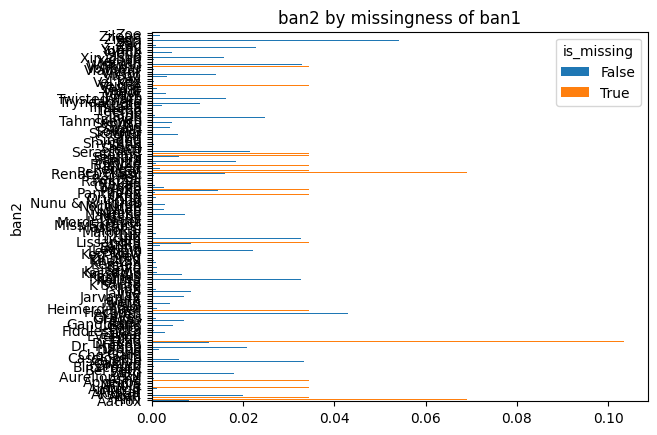

In [123]:
observed_test_stat, test_stats = permutation_test(league_raw, "ban1", "ban2")
print(f"P-Value: {np.mean(test_stats >= observed_test_stat)}")
fig = px.histogram(test_stats, x=0, nbins=50, histnorm='probability', title='Perm Test')
fig.add_vline(x=observed_test_stat, line_color='red')

# MAR: ban2

<AxesSubplot:title={'center':'result by missingness of ban1'}, ylabel='result'>

P-Value: 0.87


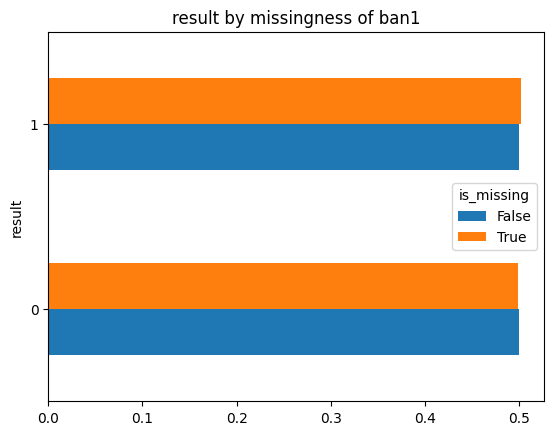

In [124]:
observed_test_stat, test_stats = permutation_test(league_raw, "ban1", "result")
print(f"P-Value: {np.mean(test_stats >= observed_test_stat)}")
fig = px.histogram(test_stats, x=0, nbins=50, histnorm='probability', title='Perm Test')
fig.add_vline(x=observed_test_stat, line_color='red')

# MCAR: result

In [ ]:
league_test.loc[
    league_test["ban1_missing"] == True,
    "ban2"
].value_counts()

Draven          18
Aatrox          12
Renata Glasc    12
Azir            12
Senna            6
Ahri             6
Aphelios         6
Riven            6
Sejuani          6
Amumu            6
Akali            6
Vayne            6
Taliyah          6
Ornn             6
Caitlyn          6
Teemo            6
Renekton         6
Volibear         6
Ezreal           6
Lillia           6
Poppy            6
Syndra           6
Hecarim          6
Yone             6
Name: ban2, dtype: int64

In [ ]:
league_test.groupby("ban1_missing")["ban2"].mean()

TypeError: can only concatenate str (not "int") to str

In [ ]:

faker_data = league_raw.loc[
    # (league_raw["champion"] == "Talon"),
    (league_raw["playername"] == "Faker"),
    ["teamname", "playername", "champion", "result"]
]
faker_data["result"].mean()
# Confirmed that 1 means win, 0 means loss
# https://gol.gg/players/player-stats/48/season-S12/split-ALL/tournament-ALL/J (74.3% WR)

0.7430555555555556

In [ ]:
talon_data = league_raw.loc[
    (league_raw["champion"] == "Talon"),
    ["teamname", "playername", "champion", "result"]
]
talon_data.shape, talon_data["result"].mean()

((65, 4), 0.5538461538461539)

In [ ]:
# EGR - early game rating
# MLR - mid late game rating

In [ ]:
matchgb[["participantid", "teamname", "playername", "champion", "ban1", "ban2", "doublekills", "result"]]

,participantid,teamname,playername,champion,ban1,ban2,doublekills,result
0,1,Fredit BRION Challengers,Soboro,Renekton,Karma,Caitlyn,0.0,0
1,2,Fredit BRION Challengers,Raptor,Xin Zhao,Karma,Caitlyn,0.0,0
2,3,Fredit BRION Challengers,Feisty,LeBlanc,Karma,Caitlyn,0.0,0
3,4,Fredit BRION Challengers,Gamin,Samira,Karma,Caitlyn,0.0,0
4,5,Fredit BRION Challengers,Loopy,Leona,Karma,Caitlyn,0.0,0
5,6,Nongshim RedForce Challengers,DnDn,Gragas,Lee Sin,Twisted Fate,0.0,1
6,7,Nongshim RedForce Challengers,Sylvie,Viego,Lee Sin,Twisted Fate,1.0,1
7,8,Nongshim RedForce Challengers,FIESTA,Viktor,Lee Sin,Twisted Fate,2.0,1
8,9,Nongshim RedForce Challengers,vital,Jinx,Lee Sin,Twisted Fate,3.0,1
9,10,Nongshim RedForce Challengers,Blessing,Alistar,Lee Sin,Twisted Fate,0.0,1


In [ ]:
league_raw.